<a href="https://colab.research.google.com/github/MekiahxAndres/Matematicas-Aplicadas/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="200" height="200" align="center">

#**<big><big>Matemáticas Aplicadas I</big></big><br><small> Proyecto Final<small><br>Integrantes:**

* Andrés Felipe Rivas Ospina (Monitor Evento)
* Isabella Londoño Lerma (Monitora Evento)
* William Javier Jiménez (Monitor Evento)

# Informe del Proyecto Final: Análisis y Predicción de Temperatura Diaria

**Resumen**

Este proyecto tiene como objetivo analizar las temperaturas diarias de un año y realizar predicciones para los próximos días. Utilizando un conjunto de datos simulado, se calcularon las temperaturas diarias, se identificaron las condiciones climáticas asociadas y se implementó un modelo para predecir el comportamiento de la temperatura en los próximos días basado en la tendencia de la temperatura en los últimos días.

**Generación de Datos**

Se ha generado un conjunto de datos de temperatura diaria para todo el año 2023. La temperatura de cada día se ha simulado utilizando una combinación de una función senoidal (para representar los ciclos anuales) y un ruido aleatorio (para simular las variaciones diarias). Además, se ha generado aleatoriamente una condición climática asociada a cada día, como "Soleado", "Lluvioso", "Nublado", "Despejado" o "Tormenta".

- **Fecha**: Se utilizó un rango de fechas que abarca todo el año 2023.
- **Temperatura**: Se calculó utilizando una combinación de una onda senoidal de frecuencia anual y un ruido aleatorio.
- **Condición Climática**: Se seleccionó aleatoriamente una condición climática para cada día del año.

**Análisis de Datos**

Se visualizó la evolución de la temperatura diaria a lo largo del año utilizando gráficos. Se calculó la razón de cambio de la temperatura, que representa cómo varía la temperatura de un día a otro, utilizando una derivada numérica a través de la función `np.gradient`.

- **Gráfico de Temperatura Diaria**: El primer gráfico muestra la evolución de la temperatura a lo largo del año 2023.
- **Gráfico de la Razón de Cambio de Temperatura**: El segundo gráfico ilustra cómo cambia la temperatura de un día a otro, utilizando la derivada numérica.

**Predicción de Temperatura**

Utilizando la tendencia de la temperatura de los últimos 7 días del conjunto de datos, se calculó una predicción de la temperatura para los próximos 7 días. La predicción se basa en el valor promedio de la razón de cambio de temperatura en los últimos días, asumiendo que la tendencia continuará de forma similar.

- **Cálculo de la Tendencia Actual**: Se calculó la tendencia de la temperatura durante los últimos 7 días, obteniendo el valor promedio de la razón de cambio.
- **Predicción de Temperaturas Futuras**: Se proyectaron las temperaturas para los próximos 7 días sumando la tendencia al valor de temperatura actual.

**Conclusión**

Este proyecto muestra cómo se pueden generar datos sintéticos de temperatura, analizar su evolución a lo largo del tiempo y realizar predicciones simples basadas en las tendencias actuales. El uso de métodos estadísticos como el cálculo de la derivada numérica y el análisis de tendencias proporciona un enfoque efectivo para modelar el comportamiento de variables en función del tiempo.

Este tipo de análisis puede extenderse a otros dominios, como la predicción del clima a corto plazo en áreas locales, y se puede mejorar utilizando modelos de predicción más sofisticados, como los modelos de regresión o series temporales.


Datos de ejemplo:
       Fecha  Temperatura Condicion_Climatica
0 2024-01-01    23.528105             Nublado
1 2024-01-02    21.058499            Tormenta
2 2024-01-03    22.473673             Soleado
3 2024-01-04    25.255651             Nublado
4 2024-01-05    24.766133            Lluvioso


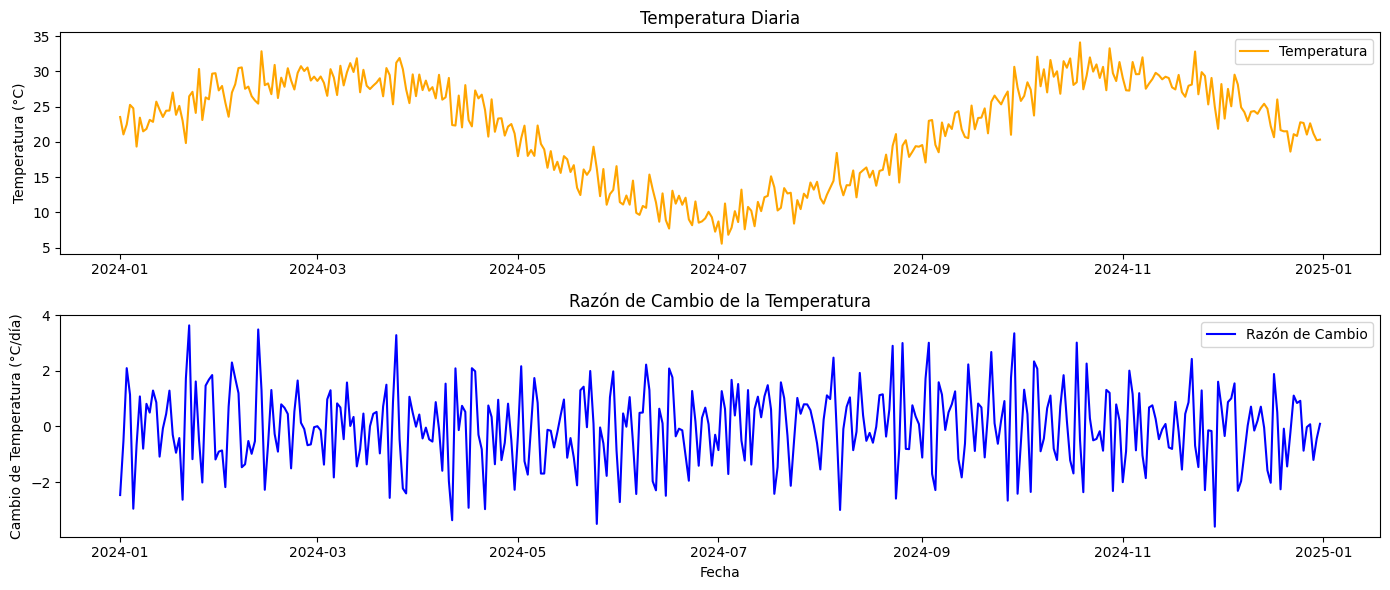

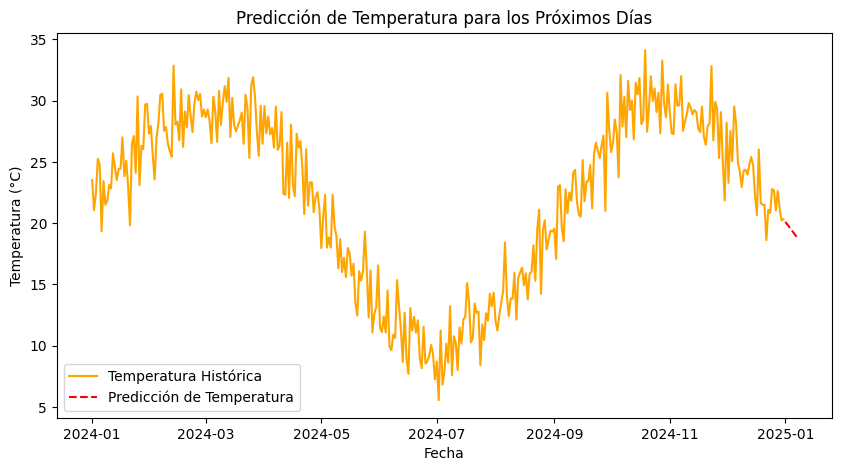

Predicción de Temperaturas para los Próximos Días:
2025-01-01: 20.12 °C
2025-01-02: 19.91 °C
2025-01-03: 19.70 °C
2025-01-04: 19.50 °C
2025-01-05: 19.29 °C
2025-01-06: 19.09 °C
2025-01-07: 18.88 °C


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
start_date = "2024-01-01"
end_date = "2024-12-31"
date_range = pd.date_range(start=start_date, end=end_date, freq='D')


temperatures = 20 + 10 * np.sin(np.linspace(0, 3 * np.pi, len(date_range))) + np.random.normal(0, 2, len(date_range))
climate_conditions = np.random.choice(["Soleado", "Lluvioso", "Nublado", "Despejado", "Tormenta"], size=len(date_range))


data = pd.DataFrame({
    "Fecha": date_range,
    "Temperatura": temperatures,
    "Condicion_Climatica": climate_conditions
})


print("Datos de ejemplo:")
print(data.head())

# Cálculo de la razón de cambio usando la derivada numérica
data['Razon_de_Cambio'] = np.gradient(data['Temperatura'])


plt.figure(figsize=(14, 6))

# Gráfico de temperatura
plt.subplot(2, 1, 1)
plt.plot(data['Fecha'], data['Temperatura'], label="Temperatura", color='orange')
plt.title("Temperatura Diaria")
plt.ylabel("Temperatura (°C)")
plt.legend()

# Gráfico de razón de cambio
plt.subplot(2, 1, 2)
plt.plot(data['Fecha'], data['Razon_de_Cambio'], label="Razón de Cambio", color='blue')
plt.title("Razón de Cambio de la Temperatura")
plt.xlabel("Fecha")
plt.ylabel("Cambio de Temperatura (°C/día)")
plt.legend()

plt.tight_layout()
plt.show()


dias_prediccion = 7
tendencia_actual = data['Razon_de_Cambio'].iloc[-7:].mean()
temperatura_actual = data['Temperatura'].iloc[-1]


predicciones = [temperatura_actual + i * tendencia_actual for i in range(1, dias_prediccion + 1)]


fechas_prediccion = pd.date_range(start=data['Fecha'].iloc[-1] + pd.Timedelta(days=1), periods=dias_prediccion)

plt.figure(figsize=(10, 5))
plt.plot(data['Fecha'], data['Temperatura'], label="Temperatura Histórica", color='orange')
plt.plot(fechas_prediccion, predicciones, label="Predicción de Temperatura", color='red', linestyle='--')
plt.title("Predicción de Temperatura para los Próximos Días")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()


print("Predicción de Temperaturas para los Próximos Días:")
for fecha, temp in zip(fechas_prediccion, predicciones):
    print(f"{fecha.date()}: {temp:.2f} °C")